<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas



In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import pandas as pd
import numpy as np
import seaborn as sns

## Bibliotecas opcionais


In [4]:
import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [5]:
dados = pd.read_csv('../Dados/Consumo_cerveja.csv', sep=';')

## Visualizar os dados

In [6]:
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


## Verificando o tamanho do dataset

In [7]:
dados.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [8]:
dados.mode().iloc[0]

data          01/01/2015
temp_media         22.76
temp_min            18.2
temp_max            27.2
chuva                0.0
fds                  0.0
consumo          24862.0
Name: 0, dtype: object

In [9]:
dados.nunique()

data          365
temp_media    277
temp_min      110
temp_max      151
chuva          93
fds             2
consumo       359
dtype: int64

In [10]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


**Data**: Cobre **365 dias únicos**, com registros para cada dia do ano.

##### Temperatura Média (temp_media):

- **Variações diárias** são observadas (**277 valores únicos**).
- **Valor mais frequente**: 22.76°C.

##### Temperatura Mínima (temp_min):

- Variação com **110** valores únicos.
- Valor mais frequente: **19.3°C**.

##### Temperatura Máxima (temp_max):

- Variação com **151** valores únicos.
- Valor mais frequente: **28°C**.

##### Chuva:

- **93** valores únicos registrados.
- Valor mais frequente: **0 mm (dias sem chuva)**.

##### Final de Semana (fds):

- Média: **0.285**(indicando que aproximadamente **28.5%** dos dias registrados **são fins de semana**).

##### Consumo de Cerveja (consumo):

- Média: **25.401 litros**.
- Desvio Padrão: **4.399 litros**.
- Mínimo: **14.343 litros**.
- Máximo: **37.937 litros**.
- **25%** dos dias têm um consumo de até **22.008 litros**.
- **50%(( dos dias têm um consumo de até **24.867 litros**.
- **75%** dos dias têm um consumo de até **28.631 litros**.

# <font color='red' style='font-size: 30px;'>Análise de Correlação</font>
<hr style='border: 2px solid red;'>

## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [11]:
correlacao = dados.corr().round(4)
correlacao

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


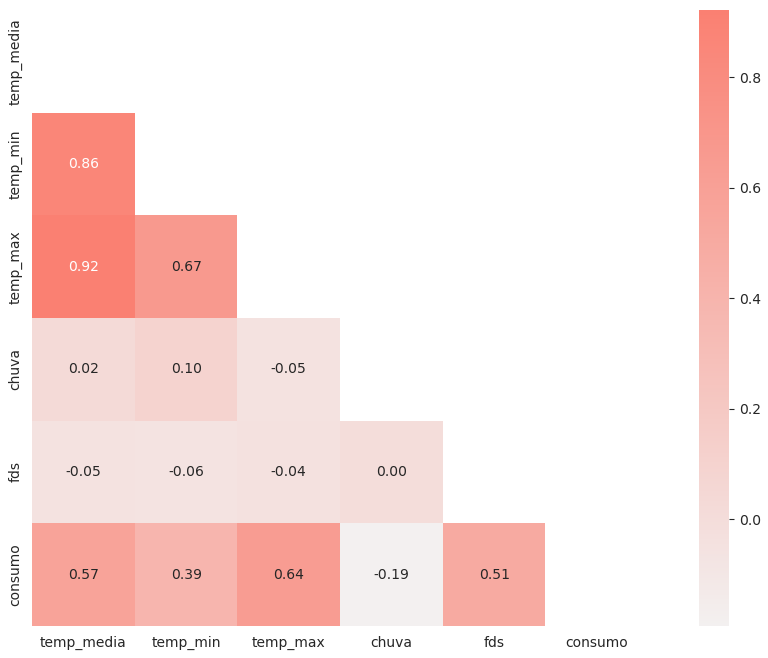

In [12]:
#visualização das correlações
cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

Consumo de Cerveja mostra correlações variadas com as outras variáveis:

- Existe uma **correlação positiva** moderada com a **Temperatura Máxima** e **Temperatura Média**, sugerindo que dias mais quentes podem ter um consumo maior de cerveja.

- A correlação com a **Temperatura Mínima** é **mais fraca**, **mas ainda positiva**.

- Há uma **correlação negativa leve com Chuva**, indicando que **dias chuvosos podem ter um consumo ligeiramente menor** de cerveja.

- A **correlação com Fim de Semana é positiva** e significativa, o que faz sentido, pois as **pessoas podem consumir mais cerveja nos fins de semana**.

- As Temperaturas (Média, Mínima, Máxima) mostram forte correlação entre si, o que é esperado, já que são medições relacionadas do mesmo dia.

- Chuva tem uma correlação negativa leve com as temperaturas, indicando que dias mais frios podem ter mais chuva.

# <font color='red' style='font-size: 30px;'>Visualização de dados</font>
<hr style='border: 2px solid red;'>

># <font color='red' style='font-size: 20px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

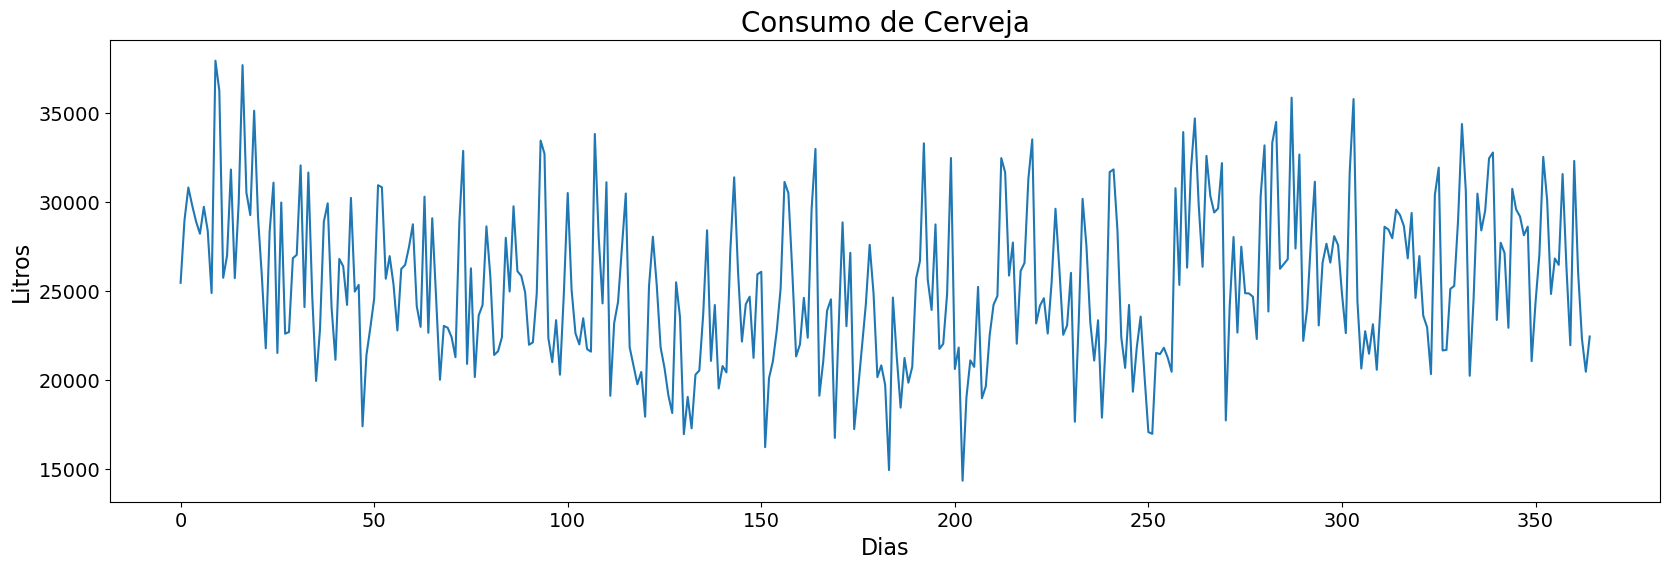

In [13]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

- **Tendência**: Não parece haver uma tendência clara de aumento ou diminuição no consumo ao longo do ano. O consumo parece bastante variável, com picos e vales.

- **Sazonalidade**: Podemos observar alguns padrões que podem indicar sazonalidade, como picos em determinados períodos que podem estar relacionados a eventos específicos ou estações do ano.

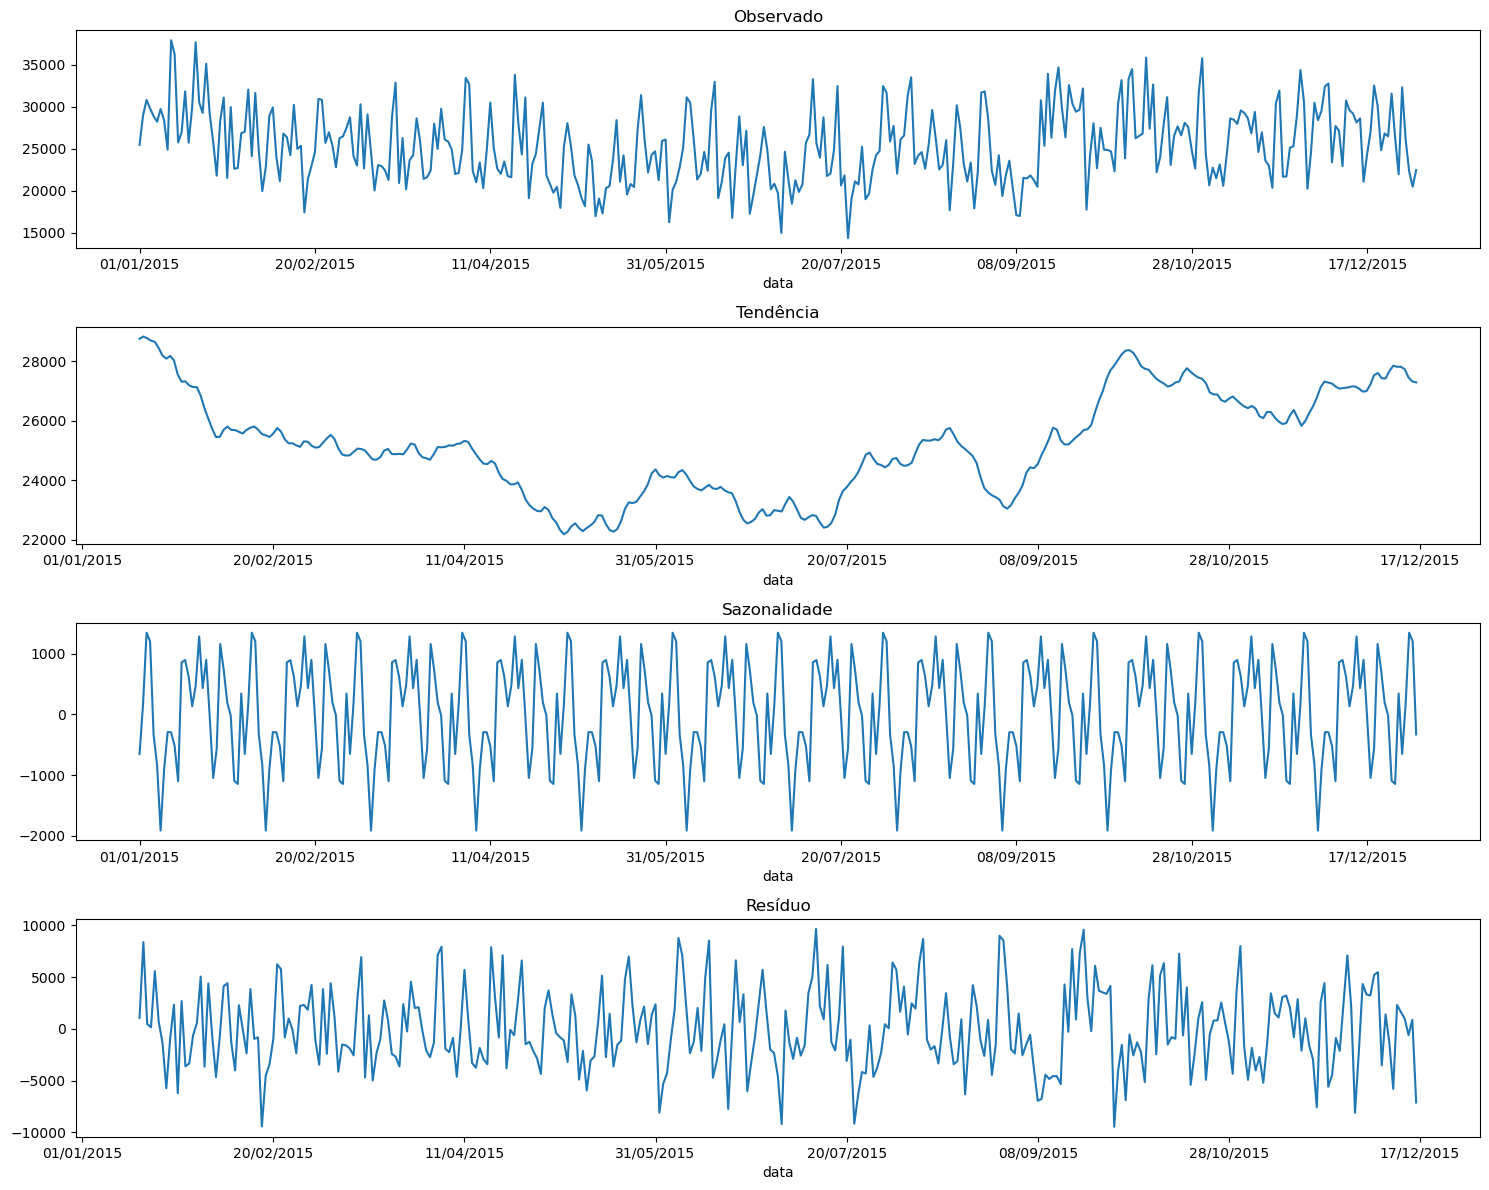

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompondo a série temporal
decomposicao = seasonal_decompose(dados.set_index('data')['consumo'], model='additive', period=30)

# Plotando a decomposição da série temporal
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
decomposicao.observed.plot(ax=ax1)
ax1.set_title('Observado')
decomposicao.trend.plot(ax=ax2)
ax2.set_title('Tendência')
decomposicao.seasonal.plot(ax=ax3)
ax3.set_title('Sazonalidade')
decomposicao.resid.plot(ax=ax4)
ax4.set_title('Resíduo')
plt.tight_layout()
plt.show()


- **Observado**: Esta é a série temporal original, mostrando as variações diárias no consumo de cerveja.

- **Tendência**: A linha de tendência não mostra uma inclinação clara para cima ou para baixo ao longo do ano. Isso sugere que não há uma tendência de longo prazo significativa no consumo de cerveja neste período.

- **Sazonalidade**: O componente sazonal mostra padrões claros e repetitivos. Isso indica que existem fatores sazonais afetando o consumo de cerveja, possivelmente relacionados a eventos específicos, feriados ou mudanças nas estações do ano.

- **Resíduo**: Este gráfico mostra o resíduo (o que resta depois de remover a tendência e a sazonalidade). Os resíduos parecem ser bastante aleatórios, o que é bom, pois indica que a tendência e a sazonalidade capturaram a maior parte da estrutura dos dados.

<Figure size 1200x600 with 0 Axes>

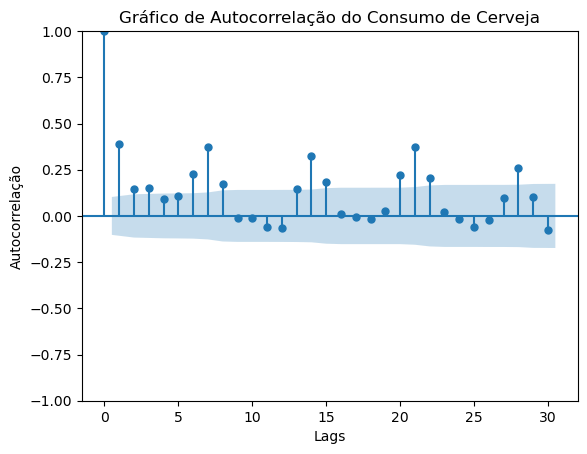

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

# Plotando o gráfico de autocorrelação
plt.figure(figsize=(12, 6))
plot_acf(dados['consumo'], lags=30)
plt.title('Gráfico de Autocorrelação do Consumo de Cerveja')
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.show()


- Há uma **autocorrelação significativa nos primeiros lags**, diminuindo gradualmente à medida que os lags aumentam. Isso sugere que o consumo de cerveja em um determinado dia está **mais fortemente relacionado com os dias imediatamente anteriores**.

- A **autocorrelação não é forte**, mas é suficientemente significativa nos primeiros dias para indicar que os padrões de consumo de cerveja têm alguma persistência ao longo do tempo.

># <font color='red' style='font-size: 20px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Box plot da variável *dependente* (y)

<Axes: title={'center': 'Consumo de Cerveja'}, ylabel='Litros'>

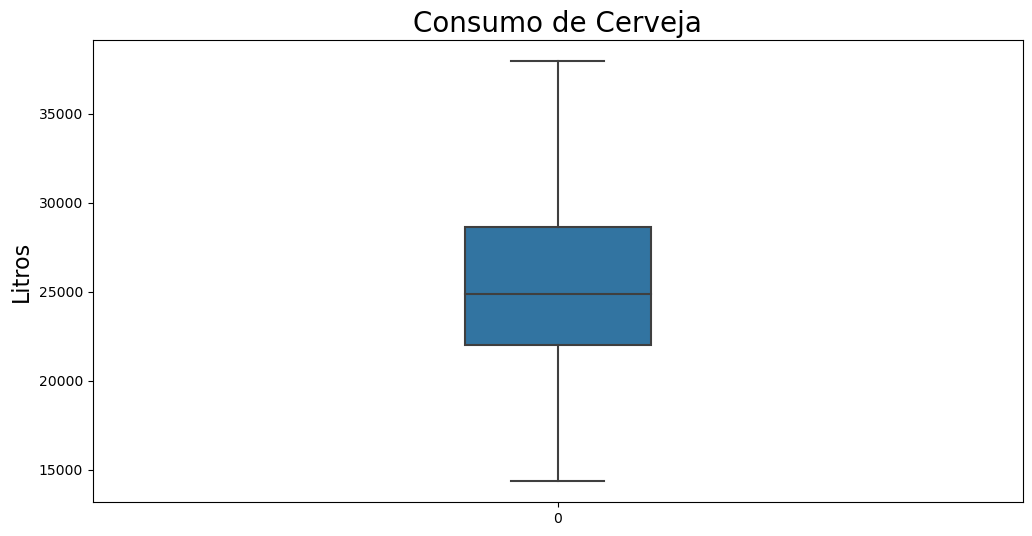

In [16]:
ax = sns.boxplot(data=dados['consumo'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

## <font color='red' style='font-size: 20px;'> Investigando a variável *dependente* (y) segundo determinada característica</font>
<hr style='border: 2px solid red;'>


># <font color='red' style='font-size: 20px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='consumo', ylabel='Consumo de Cerveja (Litros)'>

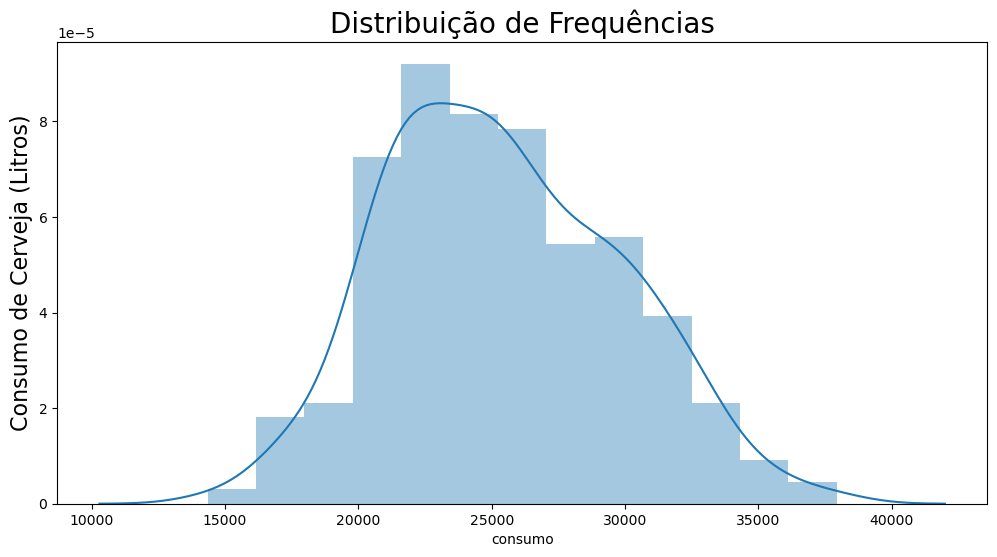

In [17]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)
ax

# <font color='red' style='font-size: 20px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

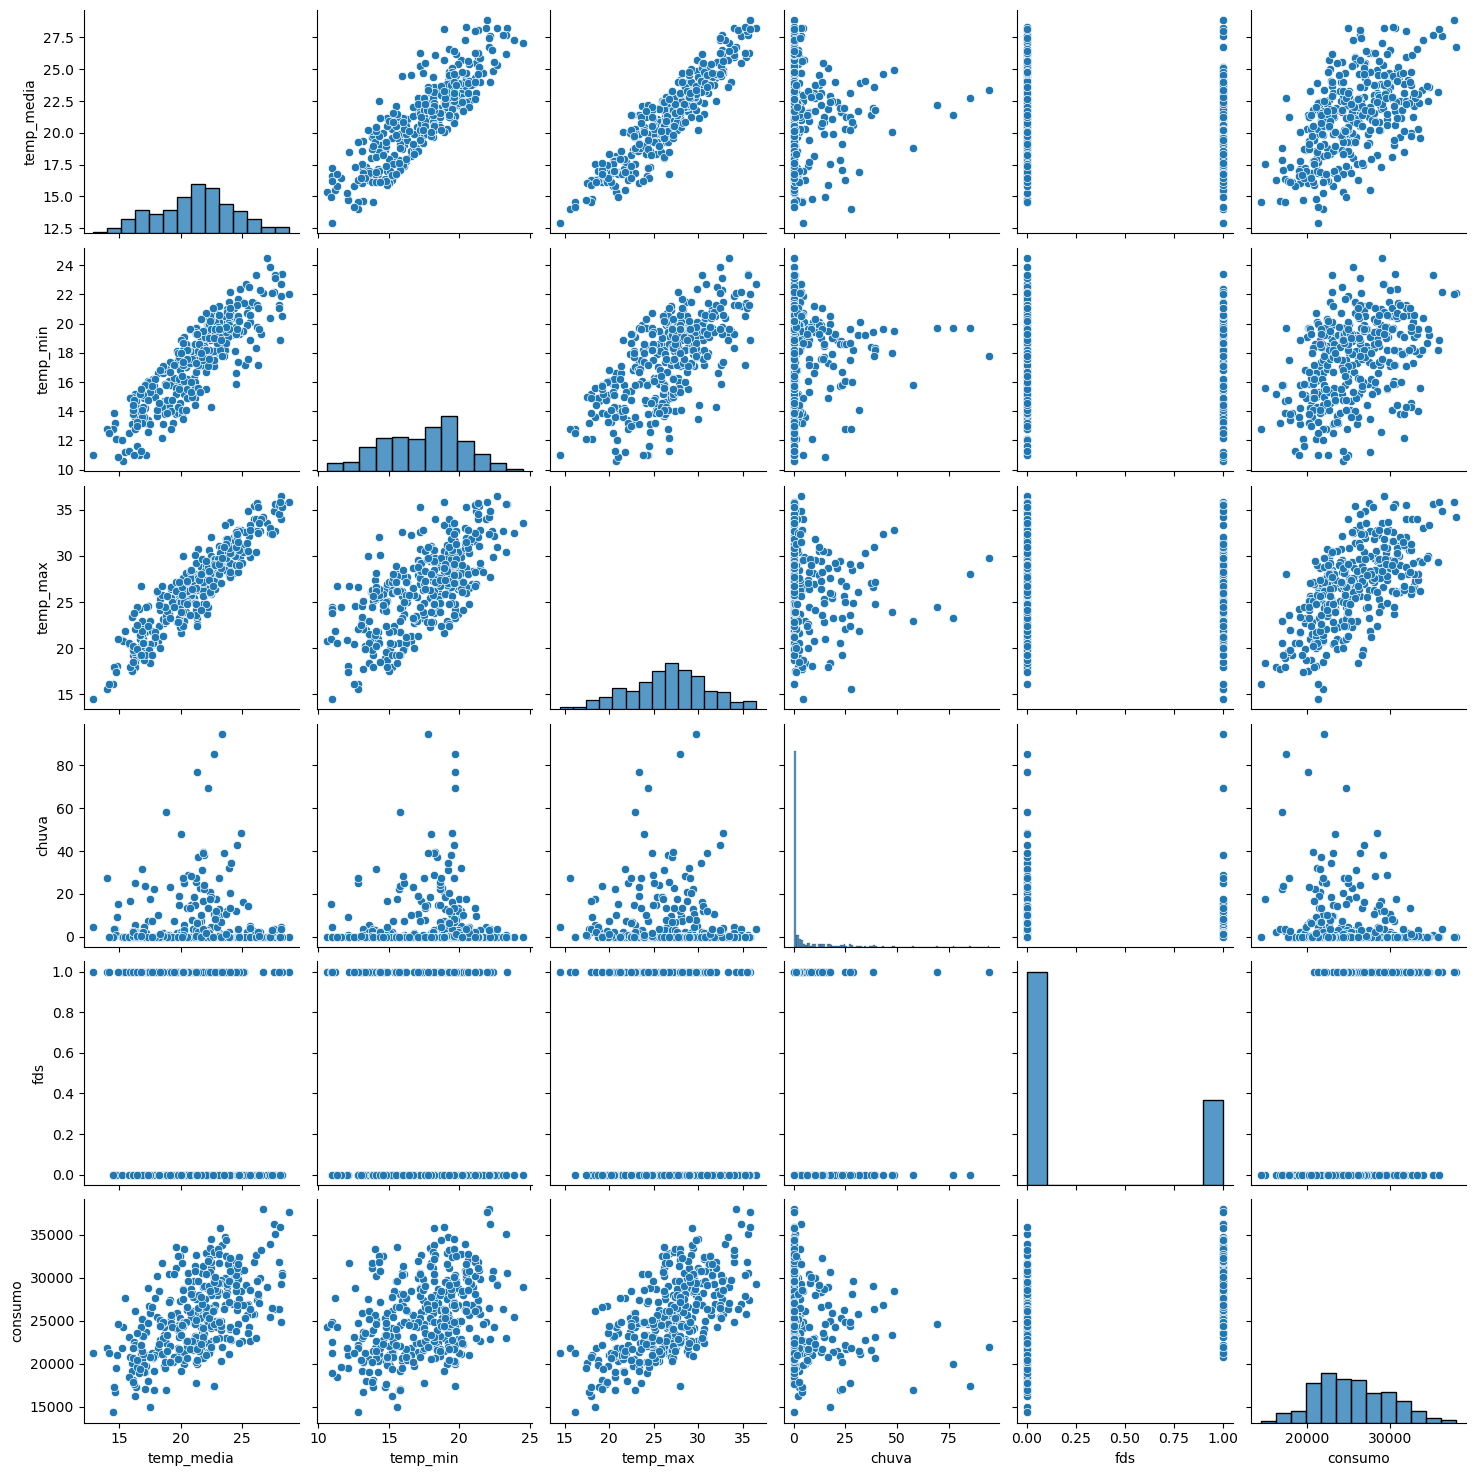

In [18]:
ax = sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

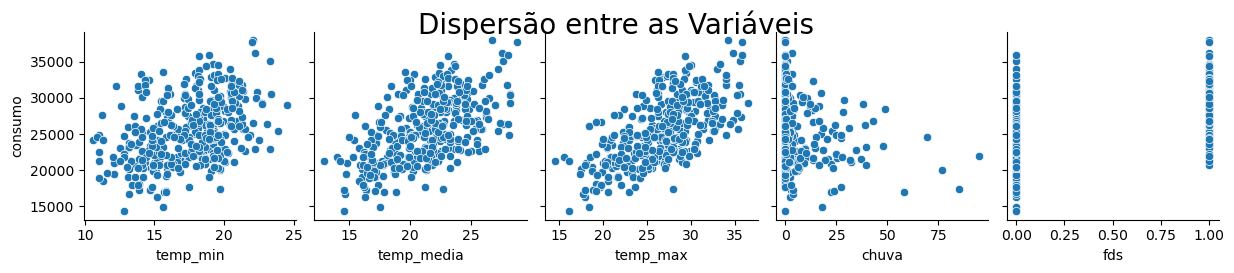

In [19]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

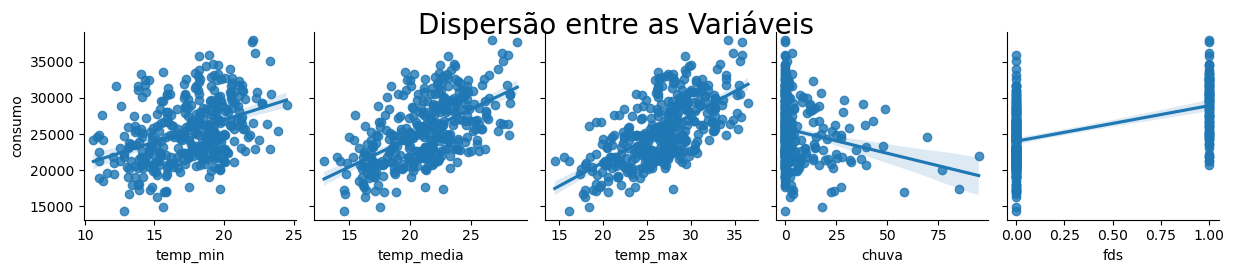

In [20]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 20px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

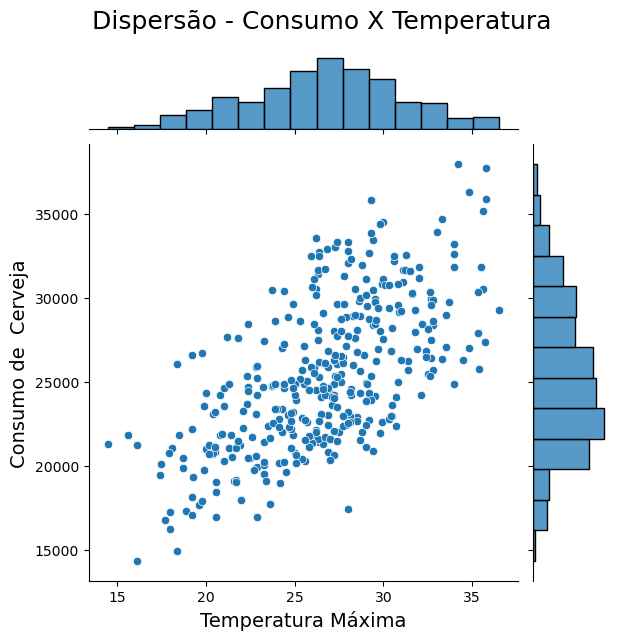

In [21]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de  Cerveja", fontsize=14)
ax

## Plotando um jointplot com a reta de regressão estimada

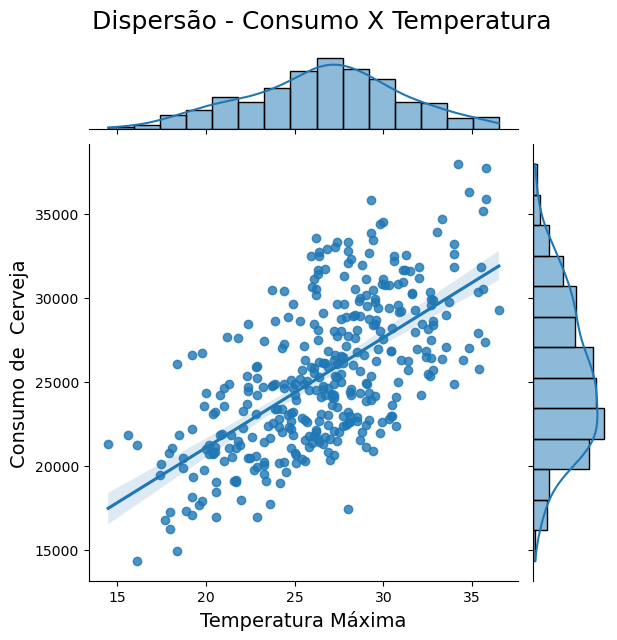

In [22]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de  Cerveja", fontsize=14)
ax

# <font color='red' style='font-size: 20px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

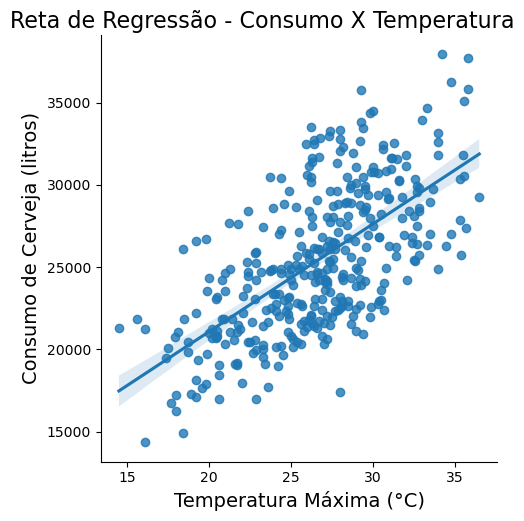

In [23]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

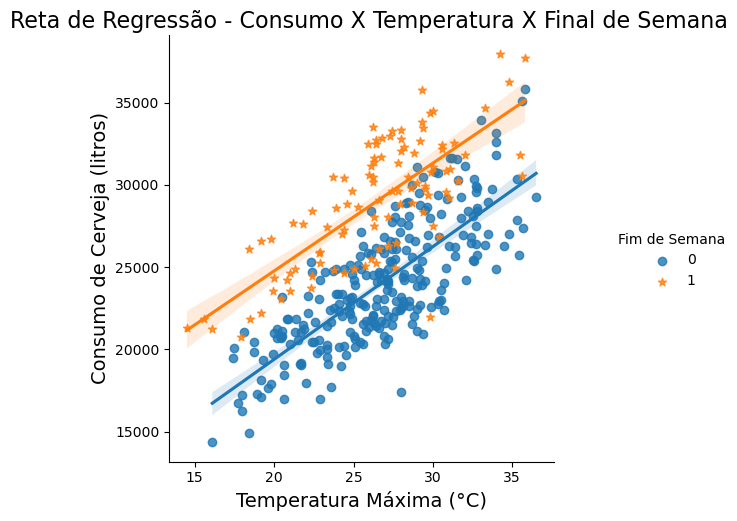

In [24]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, hue="fds", markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana")
ax

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

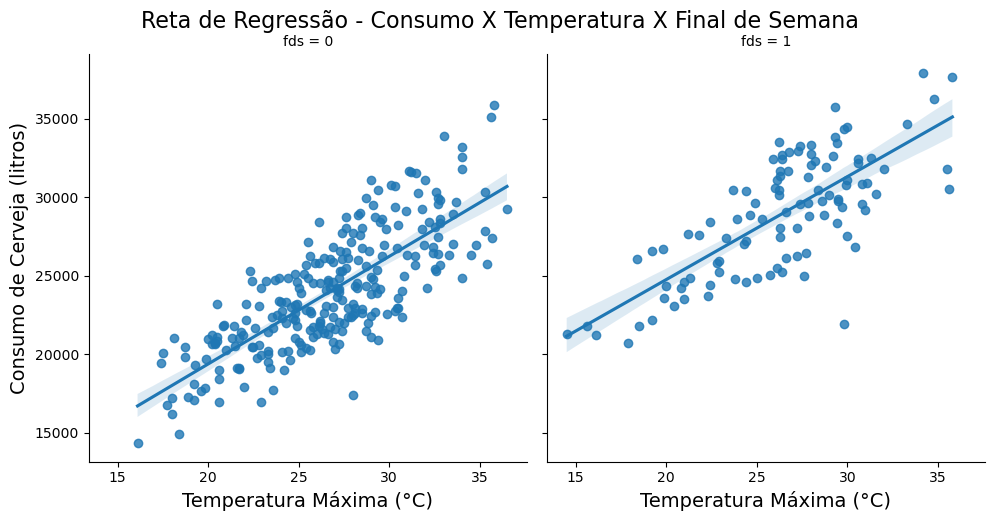

In [25]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, col="fds")
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Criação de Hipóteses</font>
<hr style='border: 2px solid red;'>

### Hipótese 1: O consumo médio de cerveja é significativamente maior nos fins de semana do que nos dias de semana.

># <font color='red' style='font-size: 20px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

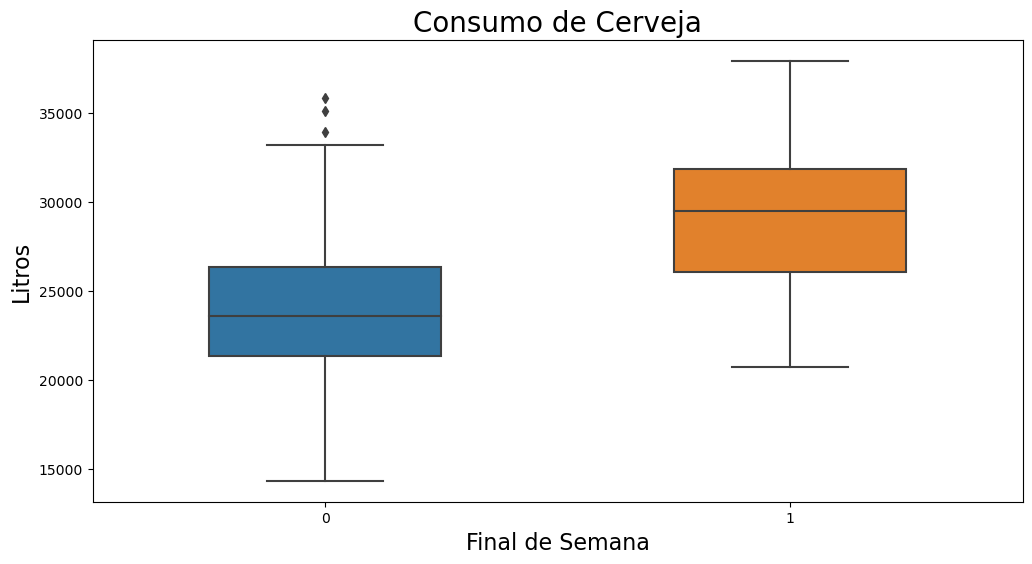

In [26]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

In [27]:
from scipy.stats import ttest_ind

# Separando os dados de consumo em dias de semana e fins de semana
consumo_fds = dados[dados['fds'] == 1]['consumo']
consumo_dia_semana = dados[dados['fds'] == 0]['consumo']

# Realizando o teste t para amostras independentes
t_stat, p_valor = ttest_ind(consumo_fds, consumo_dia_semana)

t_stat, p_valor


(11.176488992433205, 4.007968803045999e-25)

- Estatística t: 11.18
- P-valor: Aproximadamente 4.01 x 10^-25



A estatística t elevada e o p-valor extremamente baixo sugerem que **rejeitamos a hipótese nula de que não há diferença significativa no consumo médio de cerveja entre dias de semana e fins de semana**. Portanto, a Hipótese 1 é suportada pelos dados, indicando que há uma diferença significativa no consumo de cerveja entre dias de semana e fins de semana, sendo maior nos fins de semana.

## Hipótese 2: Existe uma diferença significativa no consumo de cerveja entre dias com chuva e dias sem chuva.

In [28]:


# Supondo que 'dados' é o seu DataFrame e 'chuva' é a coluna com os volumes de chuva
# Adicionando a nova coluna 'dia_com_chuva'
dados['dia_com_chuva'] = dados['chuva'].apply(lambda x: 1 if x > 0.0 else 0)

# Agora 'dados' tem uma nova coluna 'dia_com_chuva' com valores 0 ou 1


<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Dia com Chuva', ylabel='Litros'>

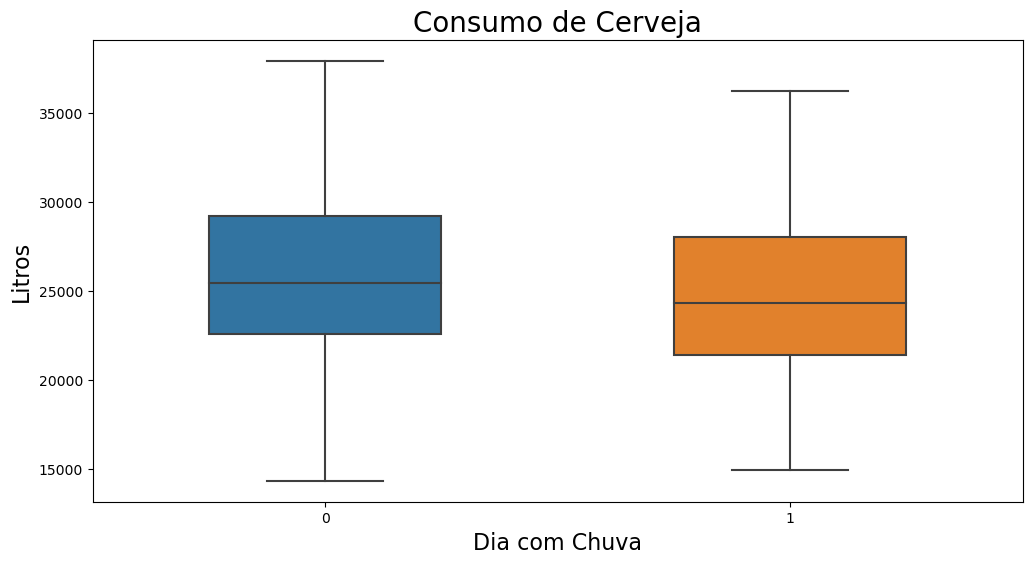

In [29]:
ax = sns.boxplot(y='consumo', x='dia_com_chuva', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dia com Chuva', fontsize=16)
ax

In [30]:
# Convertendo a coluna 'chuva' para o formato numérico
dados['chuva'] = pd.to_numeric(dados['chuva'], errors='coerce')

# Verificando se a conversão foi bem-sucedida
dados.info()

# Repetindo o teste para a Hipótese 2
consumo_com_chuva = dados[dados['chuva'] > 0]['consumo']
consumo_sem_chuva = dados[dados['chuva'] == 0]['consumo']

# Realizando o teste t novamente
t_stat_chuva, p_valor_chuva = ttest_ind(consumo_com_chuva, consumo_sem_chuva)

t_stat_chuva, p_valor_chuva


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data           365 non-null    object 
 1   temp_media     365 non-null    float64
 2   temp_min       365 non-null    float64
 3   temp_max       365 non-null    float64
 4   chuva          365 non-null    float64
 5   fds            365 non-null    int64  
 6   consumo        365 non-null    int64  
 7   dia_com_chuva  365 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 22.9+ KB


(-2.821072810530512, 0.005049432596277145)

- Estatística t: -2.82
- P-valor: Aproximadamente 0.005



A estatística t negativa indica que o consumo médio de cerveja é menor em dias com chuva em comparação com dias sem chuva. Além disso, o p-valor abaixo de 0.05 sugere que essa diferença é estatisticamente significativa. **Portanto, a Hipótese 2, que propõe uma diferença significativa no consumo de cerveja entre dias com chuva e dias sem chuva, é suportada pelos dados**.


## Hipótese 3: A temperatura média tem uma influência significativa no consumo de cerveja.

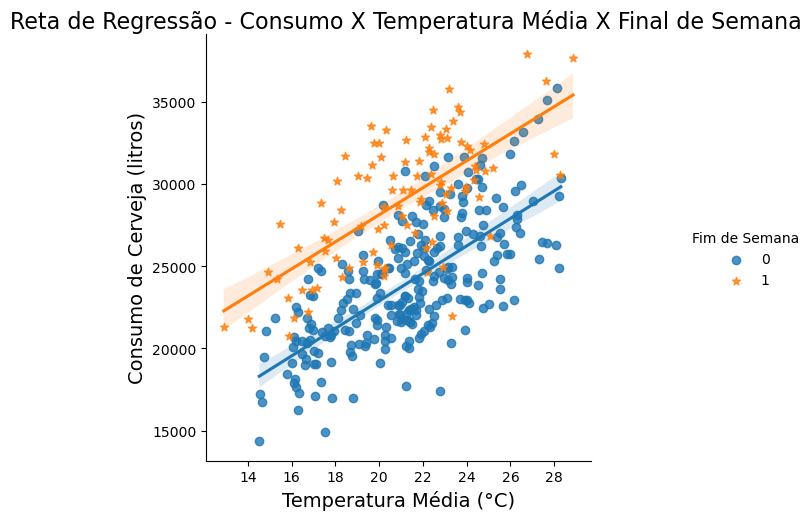

In [31]:
ax = sns.lmplot(x="temp_media", y="consumo", data=dados, hue="fds", markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura Média X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Média (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana")
ax

In [32]:
from scipy.stats import linregress

# Convertendo as temperaturas para numérico
dados['temp_media'] = pd.to_numeric(dados['temp_media'], errors='coerce')

# Realizando a regressão linear entre temperatura média e consumo de cerveja
slope, intercept, r_value, p_value, std_err = linregress(dados['temp_media'], dados['consumo'])

slope, intercept, r_value, p_value, std_err


(794.8825370043056,
 8528.907283985482,
 0.5746146964118068,
 1.8667474519450486e-33,
 59.422552791489764)



<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>→ Coeficiente angular (slope): 794.88</b><br>
Isso indica que, em média, para cada aumento de 1°C na temperatura média, o consumo de cerveja aumenta aproximadamente 794.88 litros.</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>→ Intercepto (intercept): 8528.91</b>
Este é o ponto de intercepção da linha de regressão com o eixo y. Significa que, se a temperatura média fosse 0°C, o consumo médio esperado de cerveja seria de cerca de 8528.91 litros (embora este valor não seja prático, dado que a temperatura não alcança 0°C no conjunto de dados).</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>→ Valor de R (r_value): 0.574</b>
O coeficiente de correlação de 0.574 sugere uma correlação positiva moderada entre a temperatura média e o consumo de cerveja.</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>→ P-valor (p_value): Aproximadamente 1.87 x 10^-33</b>
Este p-valor extremamente baixo indica que a relação observada entre temperatura média e consumo de cerveja é estatisticamente significativa.</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>→ Erro padrão (std_err): 59.42</b>
Este valor indica a precisão da estimativa do coeficiente angular (slope).</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Portanto, a Hipótese 3 é suportada pelos dados</b>: a temperatura média tem uma influência significativa no consumo de cerveja, com um aumento de temperatura associado a um aumento no consumo.</p></p>



# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>






## Importando o *train_test_split* da biblioteca *scikit-learn*


In [33]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [34]:
y = dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [35]:
X = dados[['temp_max', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [37]:
X_train.shape

(255, 3)

In [38]:
X_test.shape

(110, 3)

In [39]:
X_train.shape[0] + X_test.shape[0]

365

In [40]:
X.shape[0] * 0.3

109.5

In [41]:
X.shape[0] * 0.7

255.49999999999997

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [43]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)


In [44]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO



### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [45]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"


In [46]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo


In [47]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [48]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [49]:
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [50]:
temp_max=40
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [51]:
modelo.intercept_

5951.9763393124485

In [52]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [53]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [54]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [55]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [56]:
index=['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [57]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [58]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

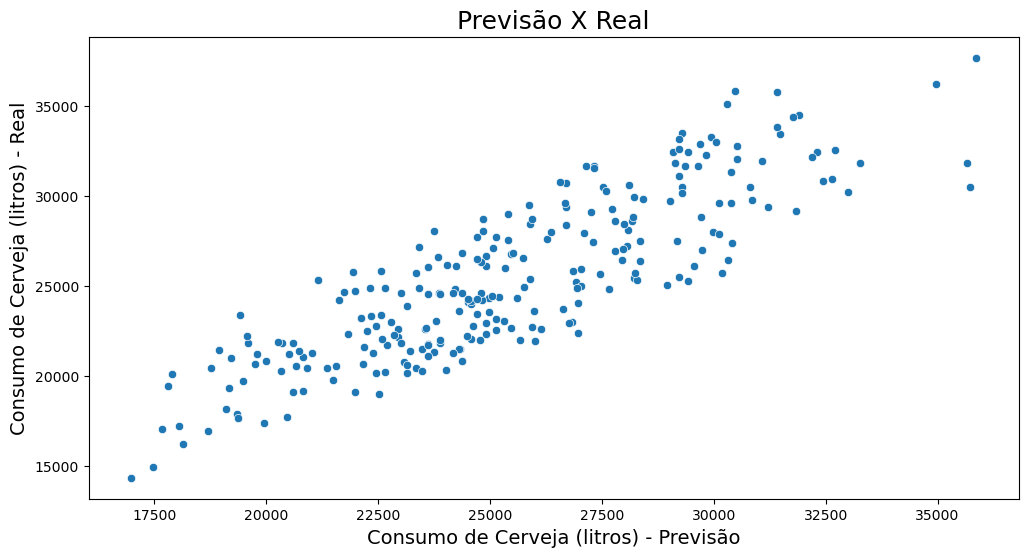

In [59]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

## Obtendo os resíduos

In [60]:
residuo = y_train - y_previsto_train

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

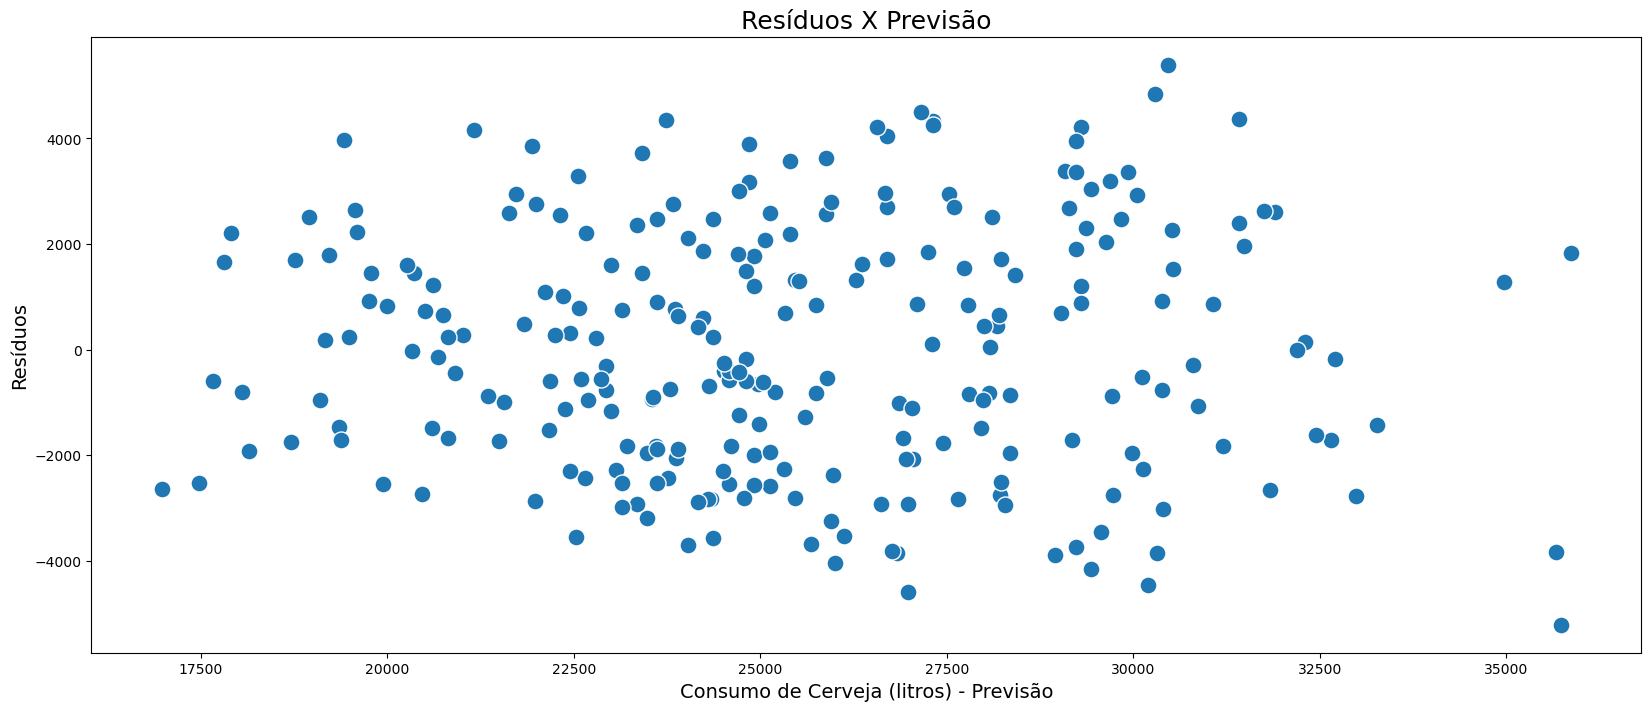

In [61]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos²'>

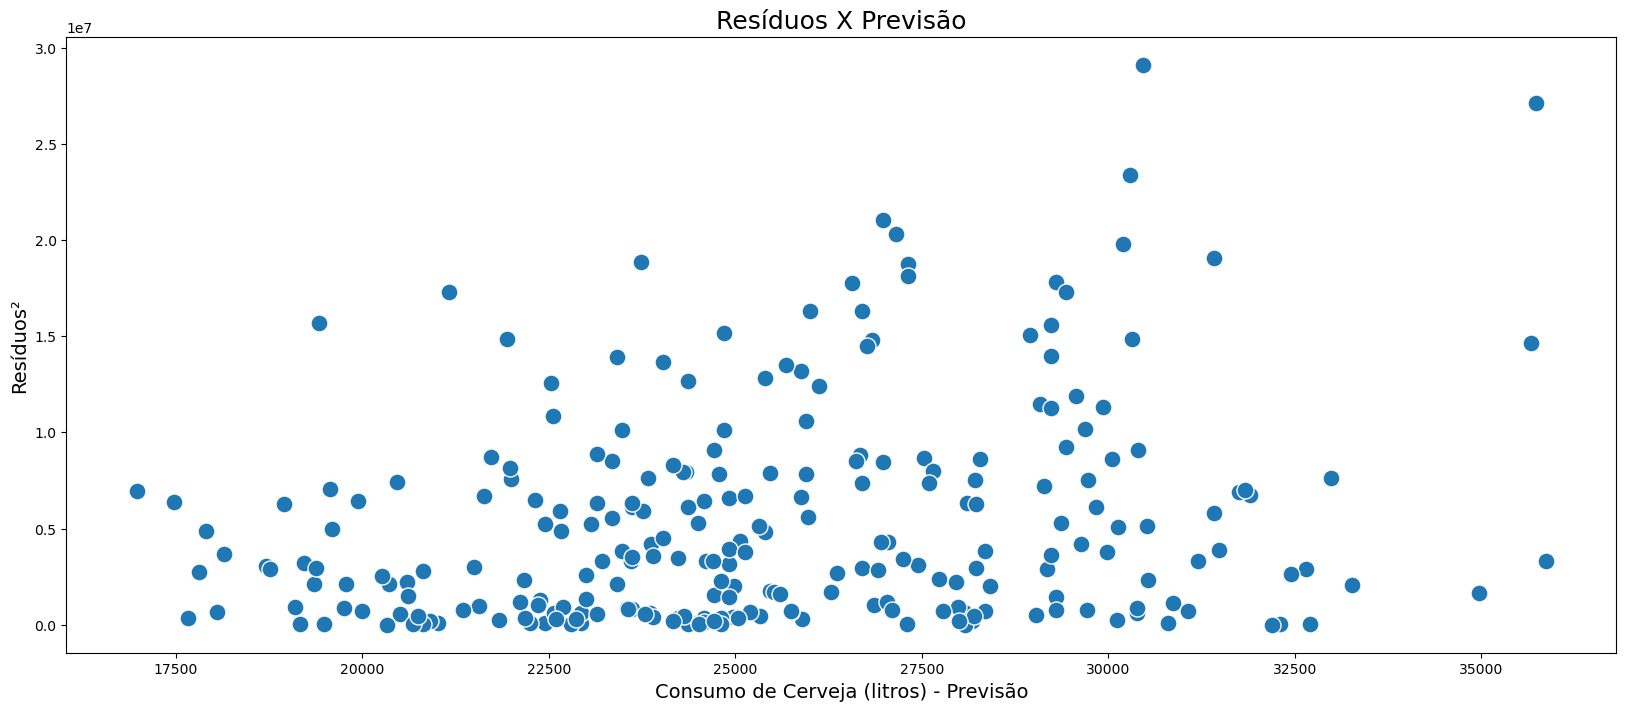

In [62]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

## Plotando a distribuição de frequências dos resíduos

<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Density'>

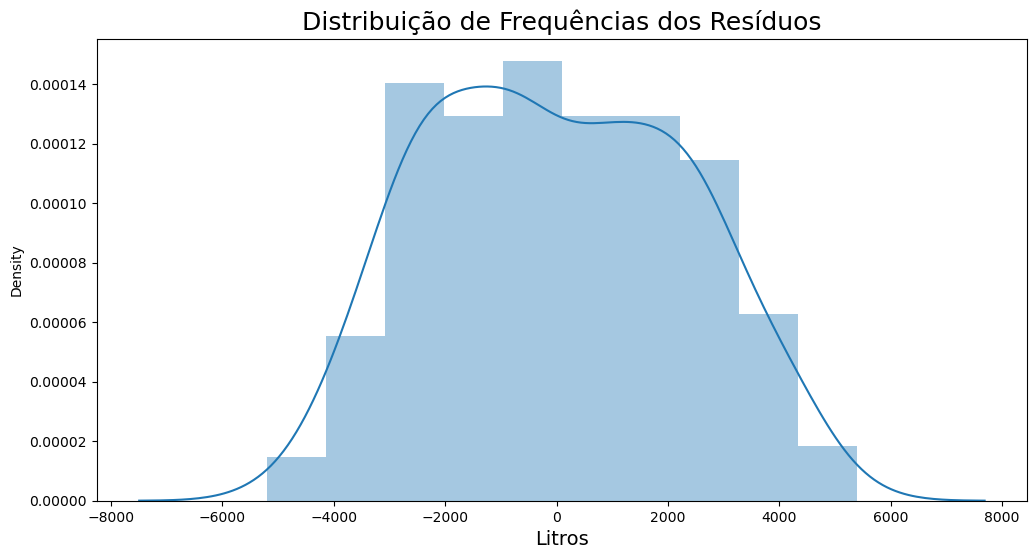

In [63]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [64]:
X2 = dados[['temp_media', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [65]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [66]:
modelo_2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [67]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [68]:
print('Modelo com Temp. Média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Temp. Média
R² = 0.66


In [69]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Temp. Máxima
R² = 0.73


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [70]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [71]:
print('Modelo com Temp. Média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_previsto_2).round(2)))

Modelo com Temp. Média
R² = 0.66


In [72]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com Temp. Máxima
R² = 0.69


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [73]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [74]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [75]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [76]:
entrada = X_test[0:1]

## Gerando previsão pontual

In [77]:
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [81]:
temp_max=30.5
chuva=12.2
fds=0
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros


## Salvando o modelo estimado

In [80]:
import pickle

output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

In [82]:
modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

In [83]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))

26094.90 litros
